In [1]:


import matplotlib.pyplot as plt
import numpy as np

from sandpile import *
from utils import *
from multiprocessing import Pool, Process, set_start_method
import multiprocessing as mp



In [6]:

def run_system(task):
    dim, grid, time_steps, path = task
    system = SandpileND(dim, grid, 7)
    system(time_steps)
    system.save_data(path)

N = 10_000
tasks = [
    (1, 20, N, "data1"),
    (2, 20, N, "data2"),
    (3, 15, N, "data3")
]

ctx = mp.get_context('fork')

with ctx.Pool() as pool:
    pool.map(run_system, tasks)


dim 3 grid 15:   0%|          | 0/9999 [00:00<?, ?it/s]

dim 2 grid 20:   0%|          | 0/9999 [00:00<?, ?it/s]

dim 1 grid 20:   0%|          | 0/9999 [00:00<?, ?it/s]

SandpileND(dimension=2, linear_grid_size=20, critical_slope=7, start_cfg=None)


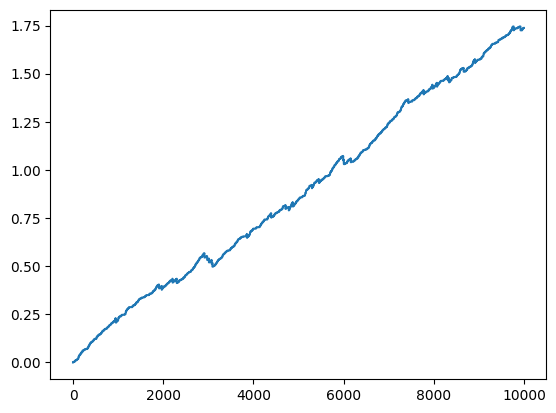

In [7]:
from sandpile import *
import matplotlib.pyplot as plt


system = SandpileND.load_from_file("data2")
print(system)

plt.plot(range(system.average_slopes.__len__()), system.average_slopes)



(array([2.192e+03, 1.028e+03, 4.810e+02, 3.680e+02, 2.090e+02, 1.460e+02,
        2.780e+02, 1.000e+02, 9.700e+01, 6.400e+01, 5.800e+01, 4.700e+01,
        1.300e+01, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 array([ 0.        ,  0.83333333,  1.66666667,  2.5       ,  3.33333333,
         4.16666667,  5.        ,  5.83333333,  6.66666667,  7.5       ,
         8.33333333,  9.16666667, 10.        , 10.83333333, 11.66666667,
        12.5       , 13.33333333, 14.16666667, 15.        , 15.83333333,
        16.66666667, 17.5       , 18.33333333, 19.16666667, 20.        ,
        20.83333333, 21.66666667, 22.5       , 23.33333333, 24.16666667,
        25.        ]),
 <BarContainer object of 30 artists>)

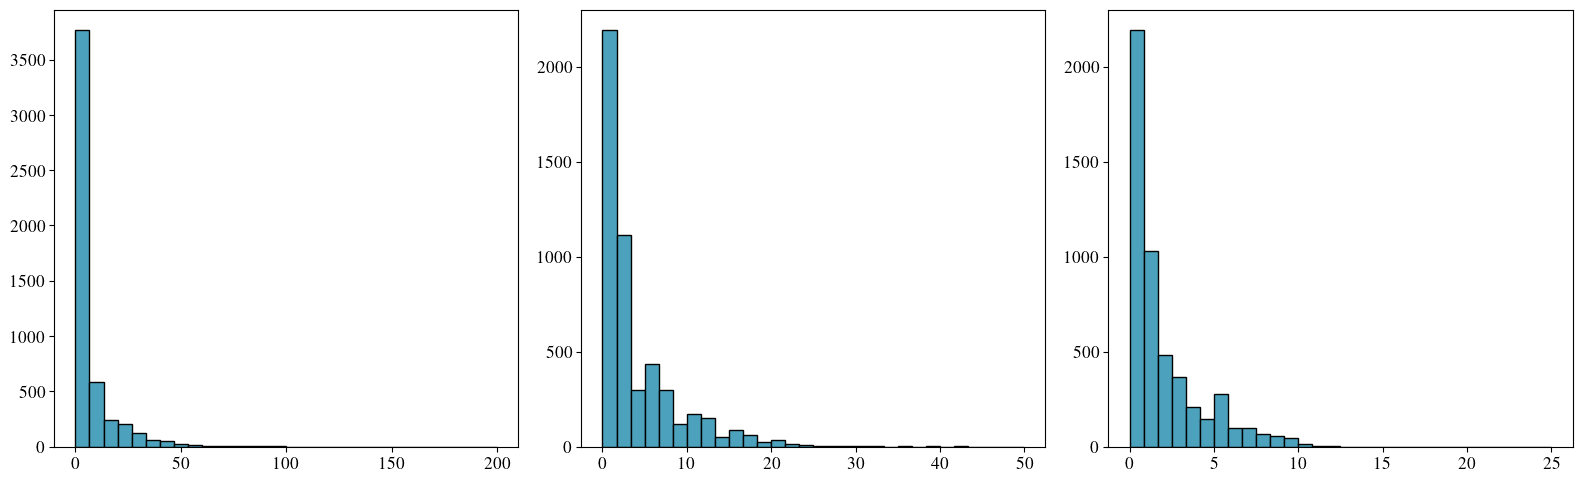

In [5]:

sizes = np.zeros(len(system.avalanches))
times = np.zeros(len(system.avalanches))
reach = np.zeros(len(system.avalanches))

for i, a in enumerate(system.avalanches):
    sizes[i] = a.size
    times[i] = a.time
    reach[i] = a.reach

plt.figure(0, figsize=(16, 5))

plt.subplot(131)
plt.hist(sizes, range=(0, 200), bins=30)

plt.subplot(132)
plt.hist(times, range=(0, 50), bins=30)

plt.subplot(133)
plt.hist(reach, range=(0, 25), bins=30)

In [8]:
# from tqdm.notebook import tqdm
# from tqdm import tqdm
# from tqdm import tqdm_notebook as tqdm
# import time
from utils import do

do()


1: 100%|██████████| 100/100 [00:03<00:00, 29.63it/s]
